In [ ]:
import cv2

image = cv2.imread("/content/2.jpg")

In [ ]:
# Grayscaling
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Thresh holding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)



In [ ]:
# Noise Reduction

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
# Alternative (for removing small black spots on a white background):
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)



In [ ]:
# Skew Correction: If the image is rotated, deskew it

import numpy as np
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

deskewed_image = deskew(opening) # Apply to your preprocessed image

In [ ]:
# Image Resizing

resized_img = cv2.resize(deskewed_image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

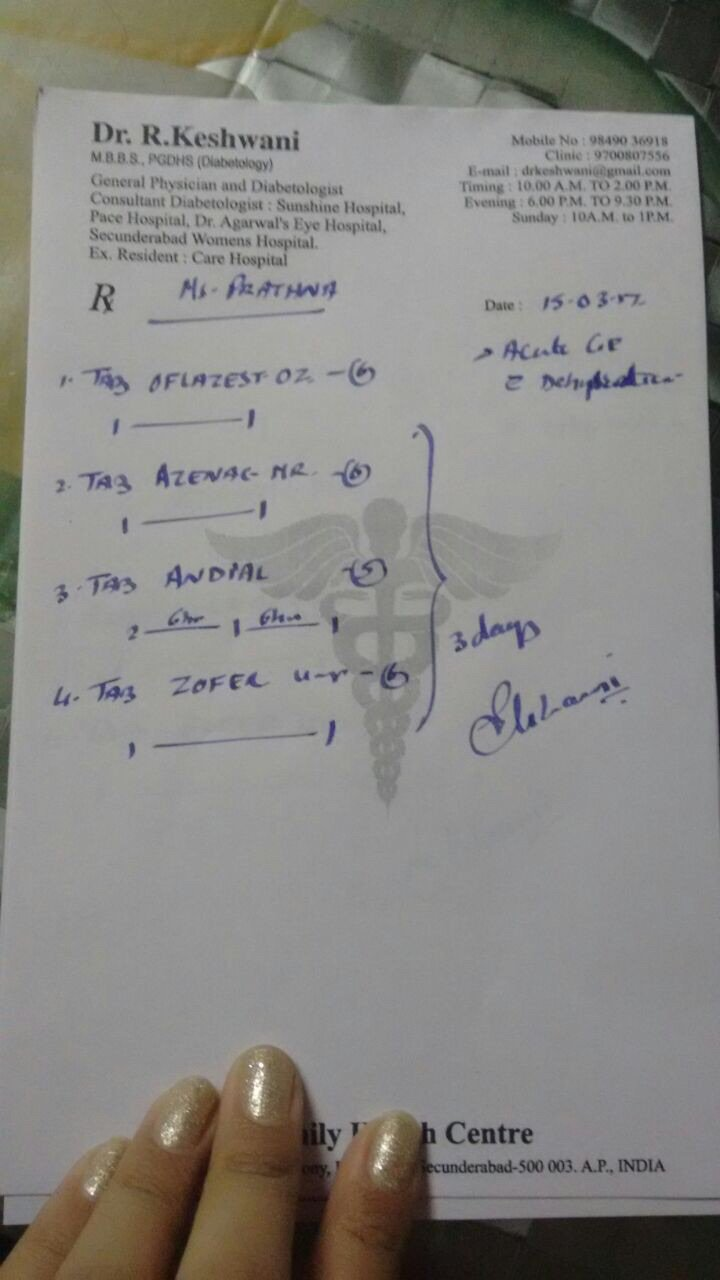

In [ ]:

from google.colab.patches import cv2_imshow

cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow



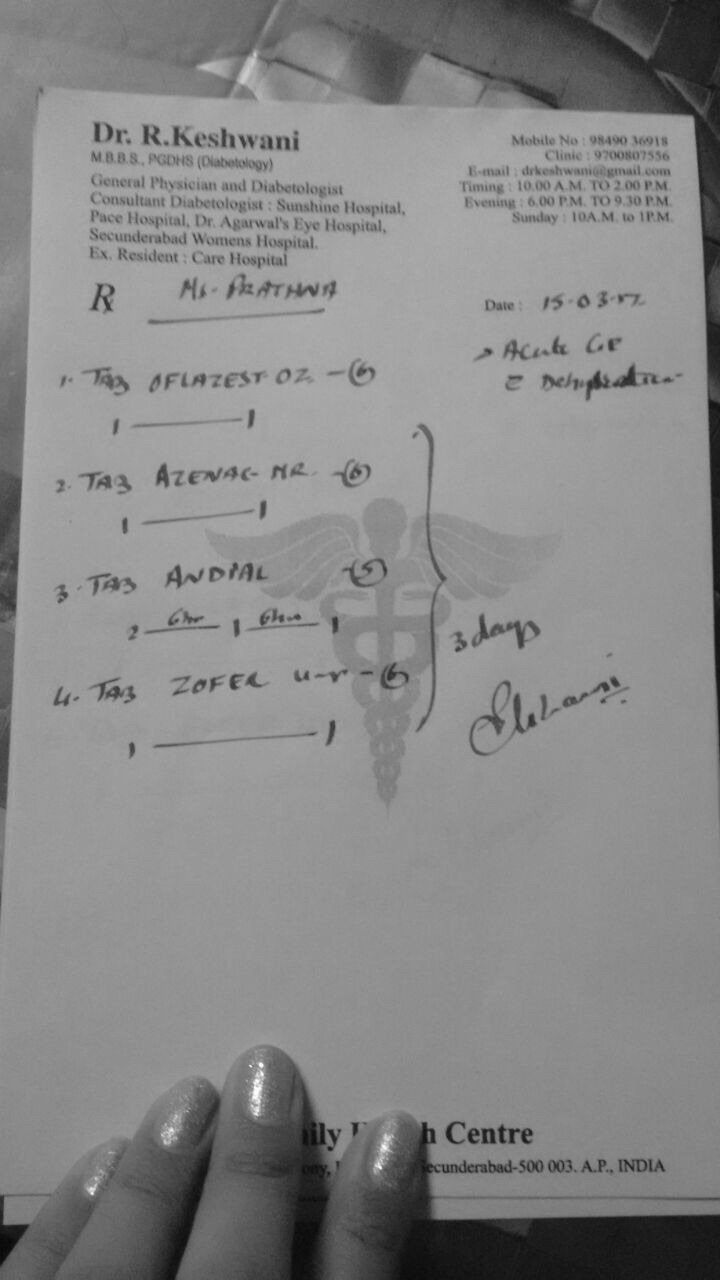

In [ ]:
# Gray
cv2_imshow(gray)

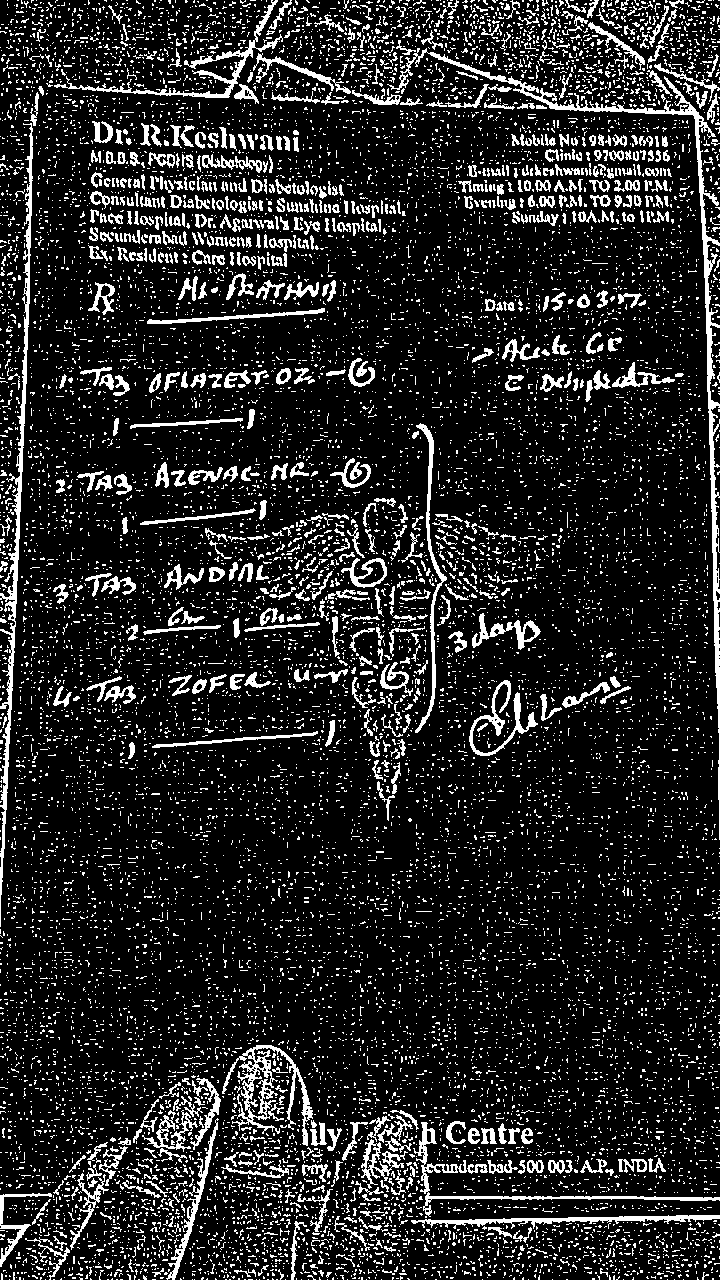

In [ ]:
# Thresh
cv2_imshow(thresh)

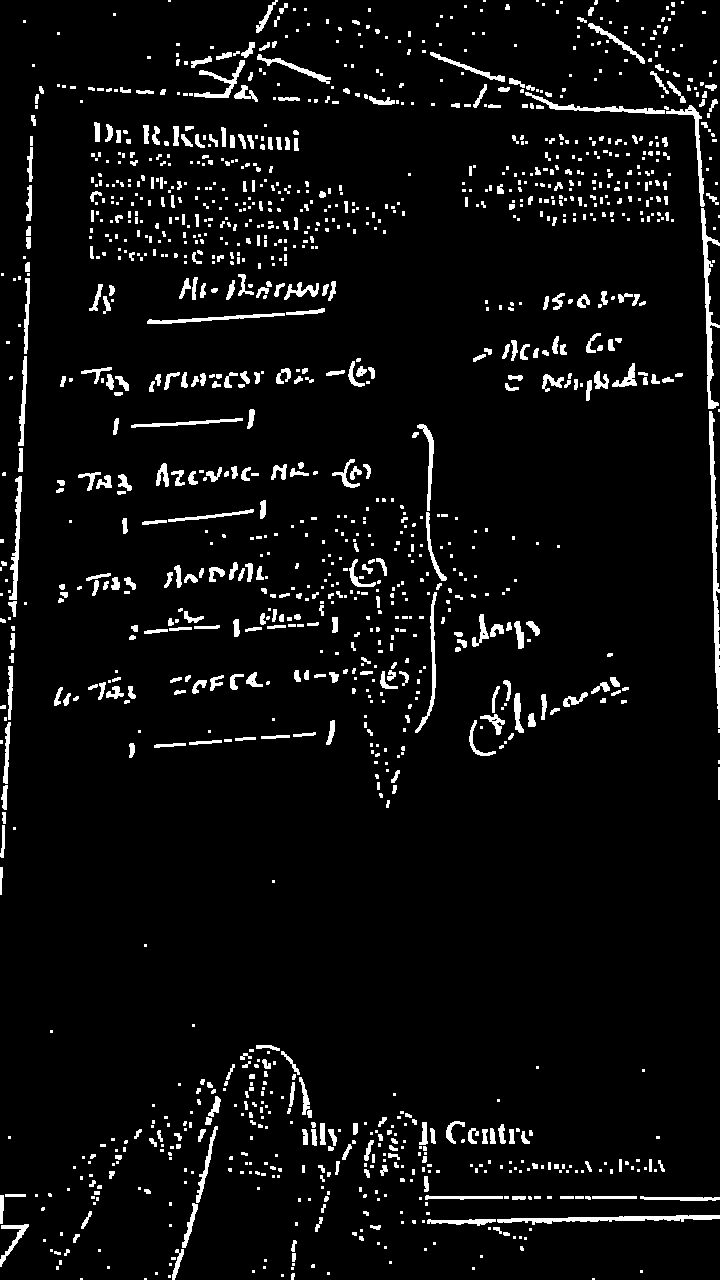

In [ ]:
# Opening
cv2_imshow(opening)

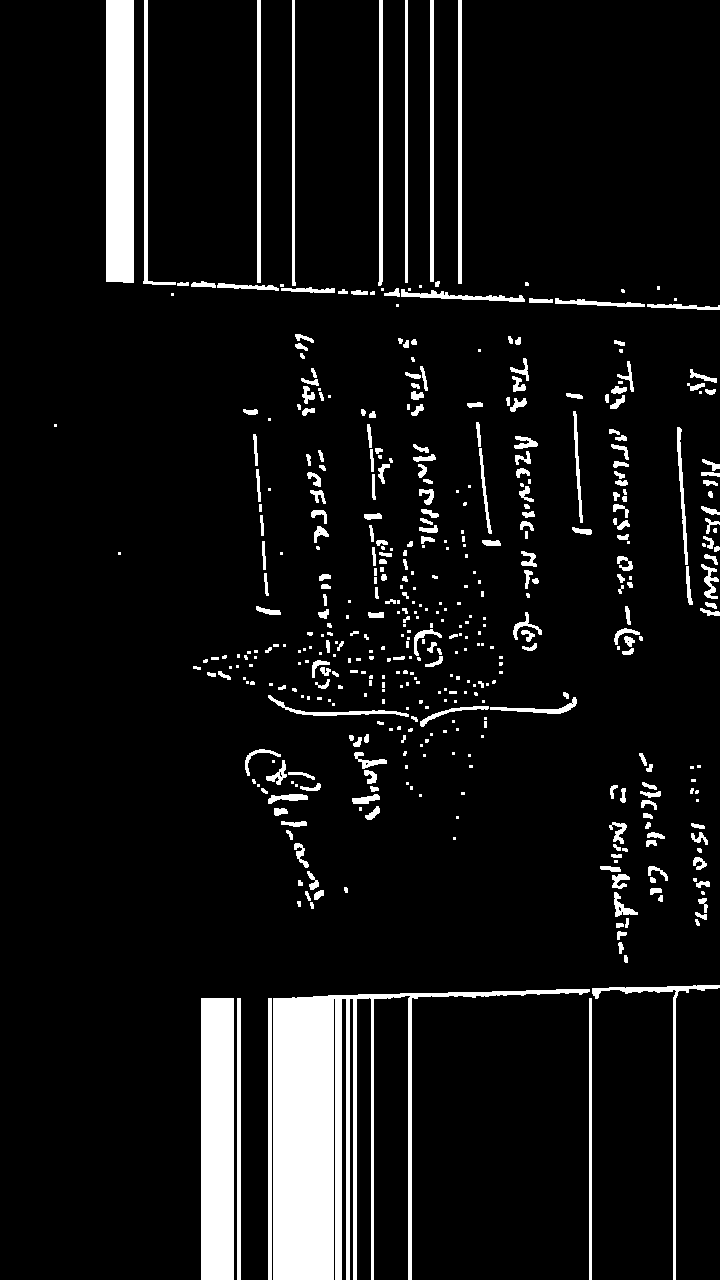

In [ ]:
# Deskewed image
cv2_imshow(deskewed_image)

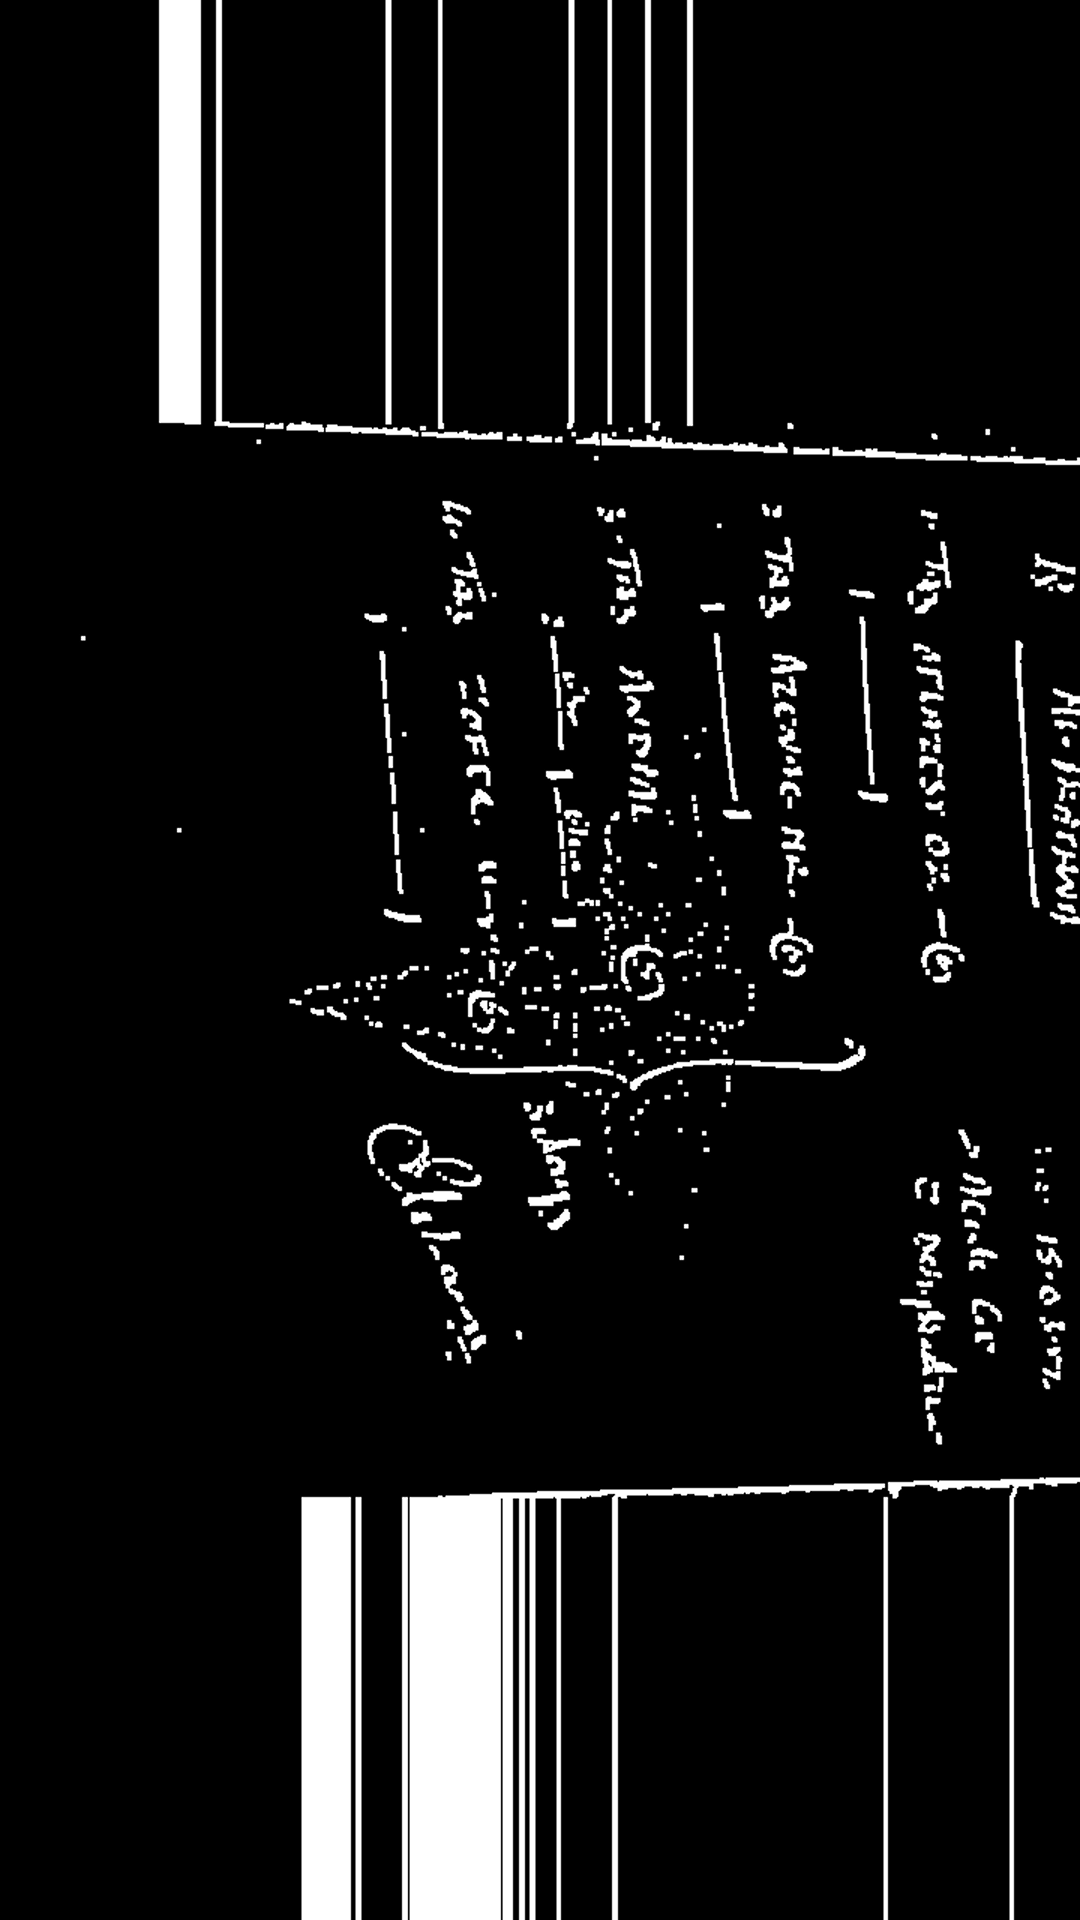

In [ ]:
# If the image is resized

cv2_imshow(resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import imutils
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import time
from base64 import b64encode
from IPython.display import Image
from pylab import rcParams


In [ ]:
  with open("/content/vision api.json", "r") as f:
       data = json.load(f)
       print(data.keys())

dict_keys(['type', 'project_id', 'private_key_id', 'private_key', 'client_email', 'client_id', 'auth_uri', 'token_uri', 'auth_provider_x509_cert_url', 'client_x509_cert_url', 'universe_domain'])


In [ ]:
ENDPOINT_URL = 'https://www.googleapis.com/oauth2/v1/certs'
api_key = data["private_key"]
img_loc = "/content/42.jpg"

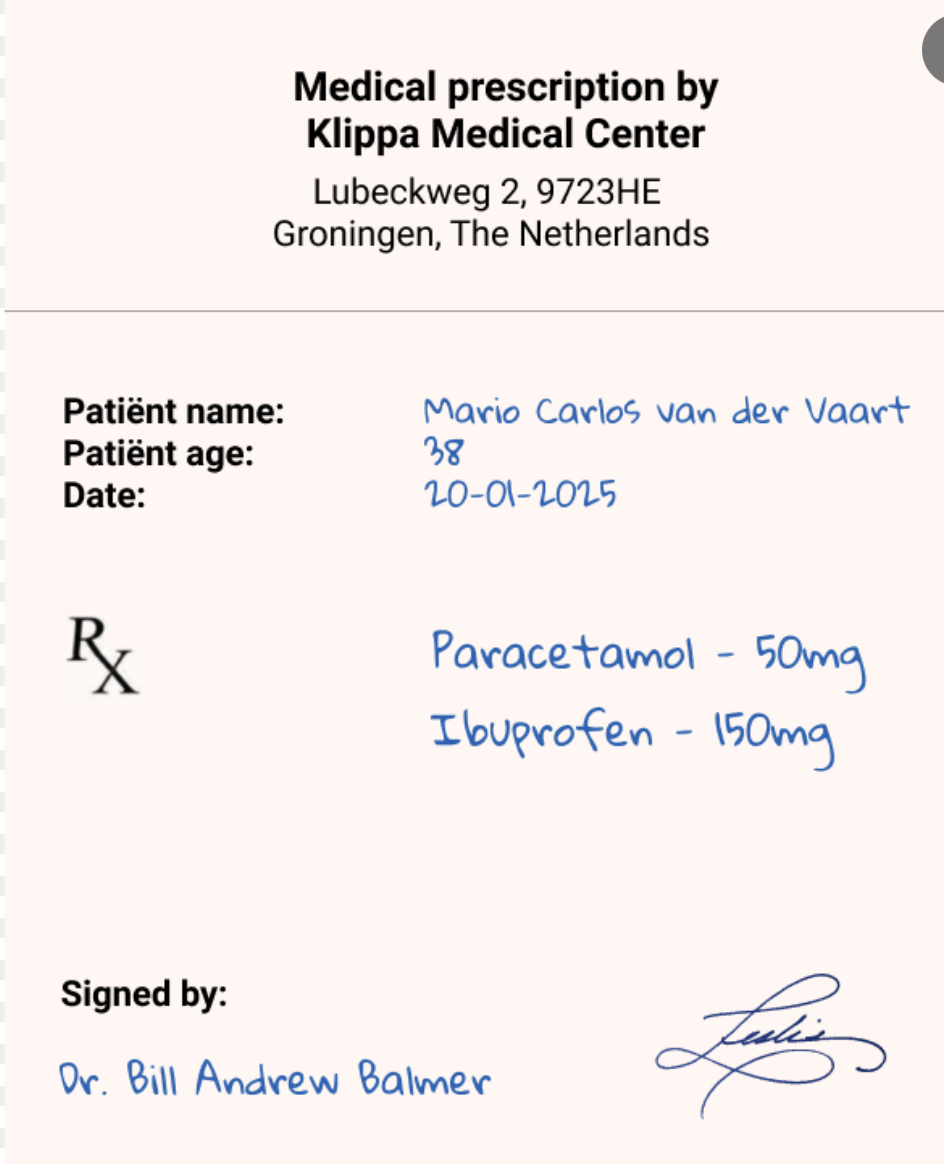

In [ ]:
Image(img_loc)

In [ ]:
!pip install google-cloud-vision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.1/526.1 kB 23.0 MB/s eta 0:00:00


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

import pytesseract
import cv2

# Path to the Tesseract executable (if not in default location)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Read the image
image_path = "/content/42.jpg"
image = cv2.imread(image_path)

# Preprocessing (optional, but can improve accuracy)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Perform OCR
text = pytesseract.image_to_string(thresh, lang='eng')


print(text)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (23.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

import pytesseract
import cv2

# Path to the Tesseract executable (if not in default location)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Read the image
image_path = "/content/42.jpg"
image = cv2.imread(image_path)

# Preprocessing (improved)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Noise removal
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Binarization
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Dilation (helps connect broken text)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(thresh, kernel, iterations=1)

# Perform OCR with OCR Engine Mode 1 (LSTM)
custom_config = r'--oem 1 --psm 6'  # OEM 1 for LSTM-based OCR, PSM 6 assumes a uniform block of text
text = pytesseract.image_to_string(dilated, lang='eng', config=custom_config)

print(text)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Medical prescription by (
Klippa Medical Center
Lubeckweg 2, 9723HE
Groningen, The Netherlands
Patient name: Mario Carlos van dev Vaart
Patiént age: Ag
Date: Lo CA LOLS
R. Favacetawmoal - 50m,
Liovevofen - 5Omna
Signed by: oe
. Ae
Qe Bil Andvew Balmer Se

